## CalEnviroScreen
Looking again at CalEnviroscreen, this time through the CSV rather than the shapefile data.

# Setting up the data

Started by importing pandas and geopandas.

In [1]:
import pandas as pd
import geopandas as gpd

I then ask pandas to read the file and converted a few of the location variables to strings in order to allow for some of the sorting and to zfill the information.

In [2]:
df = pd.read_csv('Data/Calenviroscreen4.csv',
    dtype=
    {
        'Census Tract':str,
        'California County':str,
        'Approximate Location': str
    }
)
df.head()

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.18,100.00,95-100% (highest scores),...,79.37,76.0,98.92,12.8,93.83,30.3,91.04,93.16,9.66,99.72
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.65,99.99,95-100% (highest scores),...,95.53,73.2,98.39,19.8,99.21,31.2,92.28,93.17,9.66,99.74
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.39,99.97,95-100% (highest scores),...,81.55,62.6,93.39,6.4,61.53,20.3,63.97,83.75,8.69,95.79
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.33,99.96,95-100% (highest scores),...,78.71,65.7,95.35,15.7,97.35,35.4,96.41,94.64,9.82,99.89
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.75,99.95,95-100% (highest scores),...,86.56,72.7,98.30,13.7,95.29,32.7,94.16,95.40,9.90,99.95


Above, we see that the leading zero is missing from the data, so I zfilled the information and then simplified the information to location and CalEnviroscreen percentile measures.

In [3]:
df['Census Tract'] = df['Census Tract'].str.zfill(11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 8035 non-null   object 
 1   Total Population             8035 non-null   int64  
 2   California County            8035 non-null   object 
 3   ZIP                          8035 non-null   int64  
 4   Approximate Location         8035 non-null   object 
 5   Longitude                    8035 non-null   float64
 6   Latitude                     8035 non-null   float64
 7   CES 4.0 Score                7932 non-null   float64
 8   CES 4.0 Percentile           7932 non-null   float64
 9   CES 4.0 Percentile Range     7932 non-null   object 
 10  Ozone                        8035 non-null   float64
 11  Ozone Pctl                   8035 non-null   float64
 12  PM2.5                        8035 non-null   float64
 13  PM2.5 Pctl        

In [5]:
columns_to_keep = ['Census Tract',
                   'Total Population',
                   'California County',
                   'Approximate Location',
                   'CES 4.0 Score',
                   'CES 4.0 Percentile Range',
                   'Pollution Burden Pctl',
                   'Drinking Water Pctl',
                   'Tox. Release Pctl',
                   'Cleanup Sites Pctl',
                   'Groundwater Threats Pctl',
                   'Pop. Char. Pctl',
                   'Poverty Pctl',
                   'Housing Burden Pctl',
                   'Asthma Pctl',
                   'Low Birth Weight Pctl',
                   'Cardiovascular Disease Pctl']
df2 = df[columns_to_keep]
df2.info

<bound method DataFrame.info of      Census Tract  Total Population California County  \
0     06019001100              2780           Fresno    
1     06077000700              4680       San Joaquin   
2     06037204920              2751       Los Angeles   
3     06019000700              3664           Fresno    
4     06019000200              2689           Fresno    
...           ...               ...               ...   
8030  06107004000               582           Tulare    
8031  06109985202              2509         Tuolumne    
8032  06111001206               778          Ventura    
8033  06111003012               675          Ventura    
8034  06111980000               118          Ventura    

                     Approximate Location  CES 4.0 Score  \
0                                  Fresno          93.18   
1                                Stockton          86.65   
2                             Los Angeles          82.39   
3                                  Fresno  

Next, I narrow this information to the county of Los Angeles.

In [6]:
df2LA = df2[df2['California County'] == 'Los Angeles']

And rename the Census Tracts to a FIPS variable in order to allow for analysis using one word later on. I use the info command after renaming to confirm that the data successfully narrowed from California as a whole and that the column name was successfully changed.

In [7]:
df2LA.rename(columns = {'Census Tract':'FIPS'}, inplace = True) 

/tmp/ipykernel_6245/1790350419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2LA.rename(columns = {'Census Tract':'FIPS'}, inplace = True)


In [8]:
df2LA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2343 entries, 2 to 7990
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FIPS                         2343 non-null   object 
 1   Total Population             2343 non-null   int64  
 2   California County            2343 non-null   object 
 3   Approximate Location         2343 non-null   object 
 4   CES 4.0 Score                2297 non-null   float64
 5   CES 4.0 Percentile Range     2297 non-null   object 
 6   Pollution Burden Pctl        2343 non-null   float64
 7   Drinking Water Pctl          2326 non-null   float64
 8   Tox. Release Pctl            2343 non-null   float64
 9   Cleanup Sites Pctl           2343 non-null   float64
 10  Groundwater Threats Pctl     2343 non-null   float64
 11  Pop. Char. Pctl              2297 non-null   float64
 12  Poverty Pctl                 2305 non-null   float64
 13  Housing Burden Pctl    

Next, I want to merge this information with geometry data, in this case based on census tracts, because it is the measure used in CalEnviroscreen.

In [9]:
tracts = gpd.read_file('Data/2020_Census_Tracts.geojson')
tracts.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2..."
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2..."
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2..."
3,4995,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,4996,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25590, -118.28697 34.2..."


In [10]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']

In [11]:
CEStracts=tracts.merge(df2LA,on='FIPS')

After this, I also confirm that the projection of the geodataframe is mercator in order to allow us to join our calenviroscreen information with information about oil wells in the county.

In [12]:
CEStracts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Oil Wells Data

Now, I am adding the oil wells data to the mix.

In [13]:
dfoil = pd.read_csv('Data/Oil_Wells.csv')

I create a variable for active oil wells as well in case we add oil wells to any maps later in this file.

In [14]:
df_act = dfoil.drop(dfoil[dfoil['WellStatus'] != 'A'].index)

In [15]:
gdf_act = gpd.GeoDataFrame(df_act, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df_act.Longitude, df_act.Latitude))

And now I join the oil data with CalEnviroscreen.

In [16]:
# Perform a spatial join based on geographic coordinates
gdfoilCES = gpd.sjoin(gdf_act, CEStracts, how='right', op='within')
gdfoilCES.head()

/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,index_left,X,Y,OBJECTID_left,DistrictNu,APINumber,BLMWell,DryHole,WellStatus,OperatorNa,...,Drinking Water Pctl,Tox. Release Pctl,Cleanup Sites Pctl,Groundwater Threats Pctl,Pop. Char. Pctl,Poverty Pctl,Housing Burden Pctl,Asthma Pctl,Low Birth Weight Pctl,Cardiovascular Disease Pctl
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83.13,59.51,0.0,0.00,55.69,57.79,93.89,26.53,13.91,75.46
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.57,59.19,0.0,0.00,25.44,17.49,37.48,19.65,32.47,55.53
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83.13,60.07,0.0,2.11,71.48,72.84,95.25,26.53,36.14,75.46
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83.13,61.00,0.0,35.66,27.61,27.05,56.86,13.06,17.68,45.13
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.32,61.39,0.0,14.93,44.11,48.73,53.12,15.28,60.06,38.66


And I use the info command to look at the data.

In [17]:
gdfoilCES.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 4664 entries, 0 to 2017
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   index_left                   2750 non-null   float64 
 1   X                            2750 non-null   float64 
 2   Y                            2750 non-null   float64 
 3   OBJECTID_left                2750 non-null   float64 
 4   DistrictNu                   2750 non-null   object  
 5   APINumber                    2750 non-null   float64 
 6   BLMWell                      2750 non-null   object  
 7   DryHole                      2750 non-null   object  
 8   WellStatus                   2750 non-null   object  
 9   OperatorNa                   2750 non-null   object  
 10  CountyName                   2750 non-null   object  
 11  FieldName                    2750 non-null   object  
 12  AreaName                     2750 non-null   object  
 13  

# How CES related to oil wells

In [18]:
oilwellsbytract = gdfoilCES.FIPS.value_counts().rename_axis('FIPS').reset_index(name='oilwell_count')

In [19]:
oilwellsbytract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   FIPS           2018 non-null   object
 1   oilwell_count  2018 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.7+ KB


In [20]:
# join the summary table back to the gdf
gdfoilCES=gdfoilCES.merge(oilwellsbytract,on='FIPS')

It doesn't make sense to adjust for population like we did in the lab as this feature of oil well count does not need to be adjusted by the number of people. So, next step is just to confirm that the merge worked, which it did.

In [21]:
gdfoilCES.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4664 entries, 0 to 4663
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   index_left                   2750 non-null   float64 
 1   X                            2750 non-null   float64 
 2   Y                            2750 non-null   float64 
 3   OBJECTID_left                2750 non-null   float64 
 4   DistrictNu                   2750 non-null   object  
 5   APINumber                    2750 non-null   float64 
 6   BLMWell                      2750 non-null   object  
 7   DryHole                      2750 non-null   object  
 8   WellStatus                   2750 non-null   object  
 9   OperatorNa                   2750 non-null   object  
 10  CountyName                   2750 non-null   object  
 11  FieldName                    2750 non-null   object  
 12  AreaName                     2750 non-null   object  


In [22]:
columnsfull = ['ShapeSTArea',
               'ShapeSTLength',
               'geometry',
                    'FIPS',
                   'Total Population',
                   'California County',
                   'Approximate Location',
                   'CES 4.0 Score',
                   'CES 4.0 Percentile Range',
                   'Pollution Burden Pctl',
                   'Drinking Water Pctl',
                   'Tox. Release Pctl',
                   'Cleanup Sites Pctl',
                   'Groundwater Threats Pctl',
                   'Pop. Char. Pctl',
                   'Poverty Pctl',
                   'Housing Burden Pctl',
                   'Asthma Pctl',
                   'Low Birth Weight Pctl',
                   'Cardiovascular Disease Pctl',
                    'oilwell_count']
gdfoilCES = gdfoilCES[columnsfull]
gdfoilCES.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4664 entries, 0 to 4663
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   ShapeSTArea                  4664 non-null   float64 
 1   ShapeSTLength                4664 non-null   float64 
 2   geometry                     4664 non-null   geometry
 3   FIPS                         4664 non-null   object  
 4   Total Population             4664 non-null   int64   
 5   California County            4664 non-null   object  
 6   Approximate Location         4664 non-null   object  
 7   CES 4.0 Score                4086 non-null   float64 
 8   CES 4.0 Percentile Range     4086 non-null   object  
 9   Pollution Burden Pctl        4664 non-null   float64 
 10  Drinking Water Pctl          4422 non-null   float64 
 11  Tox. Release Pctl            4664 non-null   float64 
 12  Cleanup Sites Pctl           4664 non-null   float64 


Now, I made a scatterplot to see if we see a relationship for CES and oil well counts.

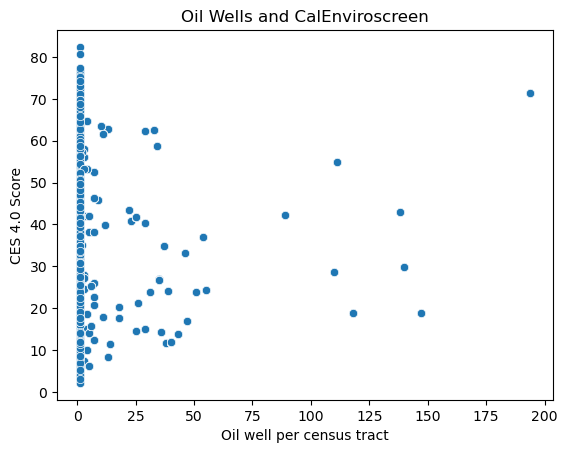

In [23]:
import seaborn as sns
ax = sns.scatterplot(x="oilwell_count", y="CES 4.0 Score", data=gdfoilCES)
ax.set_title("Oil Wells and CalEnviroscreen")
ax.set_xlabel("Oil well per census tract");

This showcases the challenge that many categories do not have any oil wells (or more accurately are marked as 1 oil well within the dataset.) So in order to look if there is a relationship here, I want to better isolate areas with a large concentration of oil wells.

In [24]:
#here I create a variable of top 10% of census tracts by the amount of oil wells.  
topoilwells = gdfoilCES.sort_values(by='oilwell_count', axis=0, ascending=False, na_position='last').head(466)

Now I run a head and tails analysis to confirm that worked and get a sense of the amount of oil wells in both categories.

In [25]:
topoilwells.head()

,ShapeSTArea,ShapeSTLength,geometry,FIPS,Total Population,California County,Approximate Location,CES 4.0 Score,CES 4.0 Percentile Range,Pollution Burden Pctl,...,Tox. Release Pctl,Cleanup Sites Pctl,Groundwater Threats Pctl,Pop. Char. Pctl,Poverty Pctl,Housing Burden Pctl,Asthma Pctl,Low Birth Weight Pctl,Cardiovascular Disease Pctl,oilwell_count
4528,3.082185e+08,77789.700597,"POLYGON ((-118.20551 33.78265, -118.20631 33.7...",06037980033,16,Los Angeles,Long Beach,NaN,NaN,98.43,...,96.46,97.72,98.29,NaN,NaN,NaN,40.49,NaN,19.52,278
4459,3.082185e+08,77789.700597,"POLYGON ((-118.20551 33.78265, -118.20631 33.7...",06037980033,16,Los Angeles,Long Beach,NaN,NaN,98.43,...,96.46,97.72,98.29,NaN,NaN,NaN,40.49,NaN,19.52,278
4461,3.082185e+08,77789.700597,"POLYGON ((-118.20551 33.78265, -118.20631 33.7...",06037980033,16,Los Angeles,Long Beach,NaN,NaN,98.43,...,96.46,97.72,98.29,NaN,NaN,NaN,40.49,NaN,19.52,278
4462,3.082185e+08,77789.700597,"POLYGON ((-118.20551 33.78265, -118.20631 33.7...",06037980033,16,Los Angeles,Long Beach,NaN,NaN,98.43,...,96.46,97.72,98.29,NaN,NaN,NaN,40.49,NaN,19.52,278
4463,3.082185e+08,77789.700597,"POLYGON ((-118.20551 33.78265, -118.20631 33.7...",06037980033,16,Los Angeles,Long Beach,NaN,NaN,98.43,...,96.46,97.72,98.29,NaN,NaN,NaN,40.49,NaN,19.52,278


In [26]:
topoilwells.tail()

,ShapeSTArea,ShapeSTLength,geometry,FIPS,Total Population,California County,Approximate Location,CES 4.0 Score,CES 4.0 Percentile Range,Pollution Burden Pctl,...,Tox. Release Pctl,Cleanup Sites Pctl,Groundwater Threats Pctl,Pop. Char. Pctl,Poverty Pctl,Housing Burden Pctl,Asthma Pctl,Low Birth Weight Pctl,Cardiovascular Disease Pctl,oilwell_count
1318,1.888165e+07,19842.785052,"POLYGON ((-118.24328 33.78473, -118.24353 33.7...",06037294701,3099,Los Angeles,Los Angeles,71.29,95-100% (highest scores),97.98,...,97.24,95.24,92.89,93.99,90.87,91.46,83.0,64.47,92.82,194
1319,1.888165e+07,19842.785052,"POLYGON ((-118.24328 33.78473, -118.24353 33.7...",06037294701,3099,Los Angeles,Los Angeles,71.29,95-100% (highest scores),97.98,...,97.24,95.24,92.89,93.99,90.87,91.46,83.0,64.47,92.82,194
1314,1.888165e+07,19842.785052,"POLYGON ((-118.24328 33.78473, -118.24353 33.7...",06037294701,3099,Los Angeles,Los Angeles,71.29,95-100% (highest scores),97.98,...,97.24,95.24,92.89,93.99,90.87,91.46,83.0,64.47,92.82,194
1321,1.888165e+07,19842.785052,"POLYGON ((-118.24328 33.78473, -118.24353 33.7...",06037294701,3099,Los Angeles,Los Angeles,71.29,95-100% (highest scores),97.98,...,97.24,95.24,92.89,93.99,90.87,91.46,83.0,64.47,92.82,194
1323,1.888165e+07,19842.785052,"POLYGON ((-118.24328 33.78473, -118.24353 33.7...",06037294701,3099,Los Angeles,Los Angeles,71.29,95-100% (highest scores),97.98,...,97.24,95.24,92.89,93.99,90.87,91.46,83.0,64.47,92.82,194


Next, I wanted to create a variable for the census tracts with either a very small or no oil wells. As the generic dataset seems to have 1 as the lowest number, I am using 5 as the threshold.

In [27]:
oilwellsyn = (gdfoilCES['oilwell_count'] < 5)
nooilwells = gdfoilCES[oilwellsyn]

In [28]:
nooilwells.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1993 entries, 0 to 4663
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   ShapeSTArea                  1993 non-null   float64 
 1   ShapeSTLength                1993 non-null   float64 
 2   geometry                     1993 non-null   geometry
 3   FIPS                         1993 non-null   object  
 4   Total Population             1993 non-null   int64   
 5   California County            1993 non-null   object  
 6   Approximate Location         1993 non-null   object  
 7   CES 4.0 Score                1967 non-null   float64 
 8   CES 4.0 Percentile Range     1967 non-null   object  
 9   Pollution Burden Pctl        1993 non-null   float64 
 10  Drinking Water Pctl          1980 non-null   float64 
 11  Tox. Release Pctl            1993 non-null   float64 
 12  Cleanup Sites Pctl           1993 non-null   float64 
 13  

Next, I wanted to create a variable for the majority of census tracts, not those with such a small amount they may not have oil wells at all.

In [29]:
anyoilwells = gdfoilCES.drop(gdfoilCES[oilwellsyn].index)

In [30]:
anyoilwells.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2671 entries, 44 to 4659
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   ShapeSTArea                  2671 non-null   float64 
 1   ShapeSTLength                2671 non-null   float64 
 2   geometry                     2671 non-null   geometry
 3   FIPS                         2671 non-null   object  
 4   Total Population             2671 non-null   int64   
 5   California County            2671 non-null   object  
 6   Approximate Location         2671 non-null   object  
 7   CES 4.0 Score                2119 non-null   float64 
 8   CES 4.0 Percentile Range     2119 non-null   object  
 9   Pollution Burden Pctl        2671 non-null   float64 
 10  Drinking Water Pctl          2442 non-null   float64 
 11  Tox. Release Pctl            2671 non-null   float64 
 12  Cleanup Sites Pctl           2671 non-null   float64 
 13 

I created a scatterplot of the relationship between oil wells and CES for after removing census tracts without oil wells, and we do see a positive correlation.

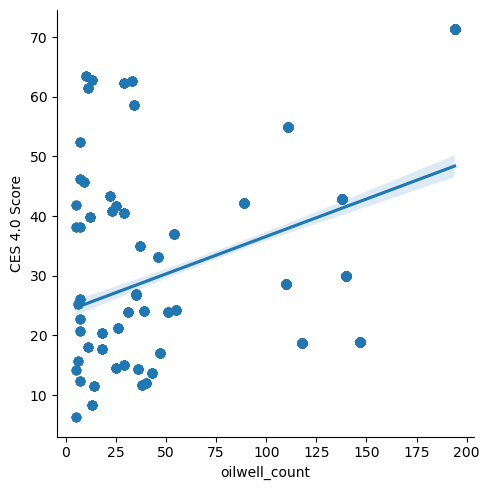

In [31]:
sns.lmplot(x="oilwell_count", y="CES 4.0 Score", data=anyoilwells);

Next, I import map tools to look at this data more closely.

I am really interested in looking at a correlation coefficient for this information so below I used scipy documentation to look at oil wells and CES. Because there are some nan figures, I had trouble with the correlation both using spatial autocorrelation and pearsons coefficient. I fuond a solution in using numpy to compare finite scores.

In [32]:
import numpy as np
from scipy import stats

oilwell_count_a = anyoilwells['oilwell_count']
CES_score_a = anyoilwells['CES 4.0 Score']

valid_indices = np.isfinite(oilwell_count_a) & np.isfinite(CES_score_a)

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(oilwell_count_a[valid_indices], CES_score_a[valid_indices])

print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.40434994842686045
P-value: 3.647932341968085e-84


We can interpret the pearson correlation as a moderate positive correlation between the count of oil wells and cal enviroscreen with a p score of less than 0.001. 

Next, I create versions of CES score across the variables I created above for graphing. 

In [33]:
CES_score_t = topoilwells['CES 4.0 Score']
CES_score_n = nooilwells['CES 4.0 Score']
CES_score = gdfoilCES['CES 4.0 Score']

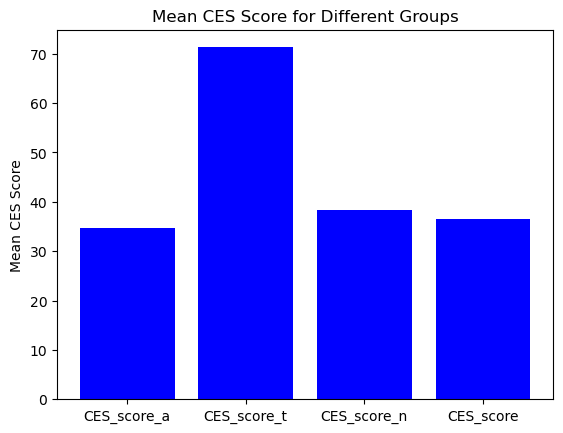

In [35]:
import matplotlib.pyplot as plt

# First comparing CES scores across all of the categories created
means = [CES_score_a.mean(), CES_score_t.mean(), CES_score_n.mean(), CES_score.mean()]
categories = ['CES_score_a', 'CES_score_t', 'CES_score_n', 'CES_score']

# Plotting the bar chart
plt.bar(categories, means, color='blue')
plt.ylabel('Mean CES Score')
plt.title('Mean CES Score for Different Groups')
plt.show()

As these were not tremendously different, I created another version using just the top CES scores compared to the data at large.

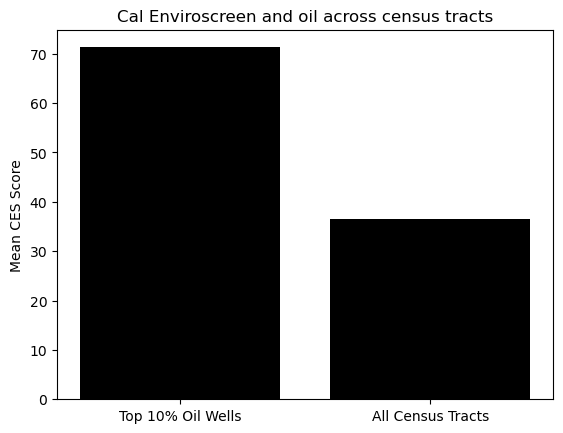

In [36]:
means = [CES_score_t.mean(), CES_score.mean()]
categories = ['Top 10% Oil Wells', 'All Census Tracts']

# Plotting the bar chart
plt.bar(categories, means, color='black')
plt.ylabel('Mean CES Score')
plt.title('Cal Enviroscreen and oil across census tracts')
plt.show()

Next, I wanted to see how the components of CalEnviroscreen might vary between these two groups.

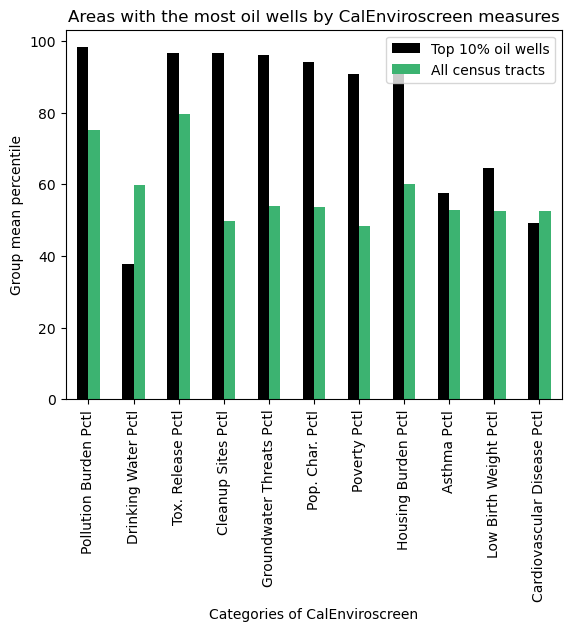

In [38]:

# Select the columns of interest
CES_columns_detail = ['Pollution Burden Pctl',
                   'Drinking Water Pctl',
                   'Tox. Release Pctl',
                   'Cleanup Sites Pctl',
                   'Groundwater Threats Pctl',
                   'Pop. Char. Pctl',
                   'Poverty Pctl',
                   'Housing Burden Pctl',
                   'Asthma Pctl',
                   'Low Birth Weight Pctl',
                   'Cardiovascular Disease Pctl']

# Calculate means for both DataFrames
means_topoilwells = topoilwells[CES_columns_detail].mean()
means_gdfstats = gdfoilCES[CES_columns_detail].mean()

# Combine means into a new DataFrame for plotting
combined_means = pd.concat([means_topoilwells, means_gdfstats], axis=1)
combined_means.columns = ['Top 10% oil wells', 'All census tracts']

# Plotting the grouped bar chart
combined_means.plot(kind='bar', color=['black', 'mediumseagreen'])
plt.ylabel('Group mean percentile')
plt.xlabel('Categories of CalEnviroscreen')
plt.title('Areas with the most oil wells by CalEnviroscreen measures')
plt.show()

This graphic provides more clarity on the high calenviroscreen rating in high oil well locations. Some of these factors seem likely included in Calenviroscreen measures, like cleanup sites and groundwater threats. Health impacts are only slightly higher, potentially insignificant, but there are differences in population characteristics, in line with the analyses we found looking at race and income, also reflected here in poverty and housing burden. 